___

<a href='https://sites.google.com/fat.uerj.br/livia'> <img src='../../figures/capa2.png' /></a>
___

In [2]:
%matplotlib inline
path_data = '../../data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import seaborn as sns

# Decisões e Incertezas

A metodologia estatística e computacional que desenvolvemos para avaliar os modelos de seleção do júri se enquadra em um quadro geral de tomada de decisão denominado *testes estatísticos de hipóteses*. O uso de testes estatísticos como forma de tomada de decisões é padrão em muitos campos e possui uma terminologia padrão.

Nesta seção, descreveremos a sequência geral das etapas usadas em testes estatísticos, juntamente com alguma terminologia.

Embora nosso exemplo seja das ciências biológicas, você verá que as etapas estatísticas e computacionais do processo são consistentes com as etapas correspondentes em nossas análises de dados do sistema jurídico. No entanto, os dados biológicos são sobre plantas, não seres humanos e injustiças. Portanto, o contexto e a interpretação dos cálculos abaixo são muito mais simples.

[Gregor Mendel](https://en.wikipedia.org/wiki/Gregor_Mendel) (1822-1884) foi um monge austríaco amplamente reconhecido como o fundador do campo moderno da genética. Mendel realizou experimentos cuidadosos e em larga escala em plantas para chegar às leis fundamentais da genética.

Muitos de seus experimentos foram em variedades de plantas de ervilha. Ele formulou conjuntos de suposições sobre cada variedade; esses eram seus modelos. Ele então testou a validade de seus modelos cultivando as plantas e coletando dados.

Para plantas de ervilha de uma determinada variedade, Mendel propôs o seguinte modelo.

## Modelo de Mendel ##
Para cada planta, há 75% de chance de que ela tenha flores roxas e 25% de chance de que as flores sejam brancas, independentemente das cores de todas as outras plantas.

Para ver se seu modelo era válido, Mendel cultivou 929 pés de ervilha dessa variedade. Entre essas 929 plantas, 705 tinham flores roxas.

Usaremos esses dados para realizar um teste de hipóteses e ver se o modelo de Mendel parece bom.

## Passo 1: As Hipóteses

Todos os testes estatísticos tentam escolher entre duas visões do mundo. Especificamente, a escolha é entre duas visões sobre como os dados foram gerados. Essas duas visões são chamadas de *hipóteses*.

**A hipótese nula.** Este é um modelo claramente definido sobre chances. Ele diz que os dados foram gerados aleatoriamente sob suposições claramente especificadas sobre a aleatoriedade. A palavra "nulo" reforça a ideia de que, se os dados parecerem diferentes do que a hipótese nula prevê, a diferença se deve a *nada* além do acaso.

Do ponto de vista prático, **a hipótese nula é uma hipótese sob a qual você pode simular dados.**

No exemplo sobre o modelo de Mendel para as cores das ervilhas, a hipótese nula é que as hipóteses de seu modelo são boas: cada planta tem 75% de chance de ter flores roxas, independente de todas as outras plantas.

Sob esta hipótese, podemos simular amostras aleatórias usando `sample_proportions`.

**A hipótese alternativa.** Isso diz que algum motivo diferente do acaso fez com que os dados diferissem das previsões do modelo na hipótese nula.

No exemplo das plantas de Mendel, a hipótese alternativa é simplesmente que seu modelo não é bom.

Lembre-se de que a alternativa não diz como ou por que o modelo não é bom. Só diz que o modelo não é bom.

## Etapa 2: a estatística de teste

Para decidir entre as duas hipóteses, devemos escolher uma estatística que possamos usar para tomar a decisão. Isso é chamado de **estatística de teste**.

Estaremos comparando duas distribuições categóricas: a do modelo de Mendel e a que obteremos em nossa amostra aleatória. Queremos ver se essas duas distribuições estão próximas ou distantes uma da outra. Portanto, uma estatística de teste natural é a distância de variação total (TVD) desenvolvida na seção anterior.

Acontece que com apenas duas categorias, o TVD é bastante simples e fácil de interpretar. Vejamos um exemplo. O modelo de Mendel diz que a distribuição "roxo, branco" é [0,75, 0,25]. Suponha que a distribuição em nossa amostra seja [0,7, 0,3].

Como existem apenas duas categorias, algo interessante acontece quando calculamos o TVD. Primeiro observe que

$$
\vert 0,7 - 0,75 \vert = 0,05 = \vert 0,3 - 0,25 \vert
$$

Então o TVD é

$$
\frac{1}{2} ( \vert 0,7 - 0,75 \vert + \vert 0,3 - 0,25 \vert ) = 0,05
= \vert 0,7 - 0,75 \vert
$$

Essa é apenas a distância entre as duas proporções de plantas com flores roxas. É também apenas a distância entre as duas proporções de plantas com flores brancas.

Por um pouco de matemática que não faremos aqui, isso é verdade sempre que houver apenas duas categorias: o TVD é igual à distância entre as duas proporções em uma categoria.

Portanto, uma estatística de teste perfeitamente adequada seria a distância entre a proporção da amostra de plantas roxas e 0,75, que é a proporção correspondente no modelo de Mendel.

Como as porcentagens são mais fáceis de interpretar do que as proporções, trabalharemos com porcentagens.

Nossa estatística de teste será a distância entre a porcentagem da amostra de plantas roxas e 75%, que é a porcentagem correspondente no modelo de Mendel.

$$
\vert \text{amostra de porcentagem de plantas com flores roxas} - 75 \vert
$$

Esta estatística de teste é uma *distância* entre as duas distribuições. Faz sentido e é fácil de usar. Uma porcentagem de amostra de cerca de 75% será consistente com o modelo, mas porcentagens muito maiores ou muito menores que 75 farão você pensar que o modelo não é bom. Portanto, pequenos valores da distância farão você se inclinar para a hipótese nula. Grandes valores da estatística farão você se inclinar para a alternativa.

Para escolher uma estatística de teste em outras situações, observe a hipótese alternativa. Quais valores da estatística farão você pensar que a hipótese alternativa é uma escolha melhor do que a nula?
- Se a resposta for "grandes valores", você tem uma boa escolha de estatística.
- Assim também se a resposta for "pequenos valores".
- Mas se a resposta for "tanto valores grandes quanto valores pequenos", recomendamos que você analise novamente sua estatística. Veja se usar uma distância em vez de uma diferença pode mudar a resposta para apenas "grandes valores".

### Valor Observado da Estatística de Teste ###
O *valor observado da estatística de teste* é o valor da estatística que você obtém dos dados do estudo, não um valor simulado. Entre as 929 plantas de Mendel, 705 tinham flores roxas. O valor observado da estatística de teste foi, portanto,

In [1]:
observed_statistic = abs( 100 * (705 / 929) - 75)
observed_statistic

0.8880516684607045

## Etapa 3: A distribuição da estatística de teste, sob a hipótese nula

O principal aspecto computacional de um teste de hipóteses é descobrir o que o modelo na hipótese nula prevê. Especificamente, temos que descobrir *quais seriam os valores da estatística de teste se a hipótese nula fosse verdadeira*.

A estatística de teste é simulada com base nos pressupostos do modelo na hipótese nula. Esse modelo envolve acaso, então a estatística sai diferente quando você a simula várias vezes.

Ao simular a estatística repetidamente, temos uma boa noção de seus valores possíveis e quais são mais prováveis do que outros. Em outras palavras, obtemos uma boa aproximação da distribuição de probabilidade da estatística, conforme previsto pelo modelo na hipótese nula.

Como em todas as distribuições, é muito útil visualizar essa distribuição por um histograma, como fizemos em nossos exemplos anteriores. Vamos passar por todo o processo aqui.

Começaremos atribuindo algumas quantidades conhecidas a nomes.

In [3]:
mendel_proportions = np.array([0.75, 0.25])
mendel_proportion_purple = mendel_proportions.item(0)
sample_size = 929

A seguir, definiremos uma função que retorna um valor simulado da estatística de teste. Em seguida, usaremos um loop `for` para coletar 10.000 valores simulados em uma matriz.

In [4]:
def sample_proportions(sample_size, sample_population):
    return np.random.multinomial(sample_size, sample_population) / sample_size

In [5]:
def one_simulated_distance():
    sample_proportion_purple = sample_proportions(929, mendel_proportions).item(0)
    return 100 * abs(sample_proportion_purple - mendel_proportion_purple)

In [6]:
repetitions = 10000
distances = np.array([])
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())

Agora podemos desenhar o histograma desses valores. Este é o histograma da *distribuição da estatística de teste prevista pela hipótese nula*.

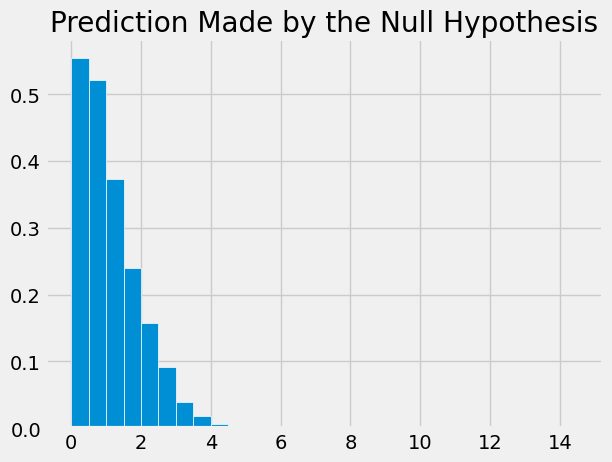

In [12]:
df_tvds = pd.DataFrame({'Distance between Sample % and 75%': distances})
df_tvds.hist(bins=np.arange(0, 15, 0.5), edgecolor='white', density=True)
plt.title('Prediction Made by the Null Hypothesis');
plt.show()

Olhe no eixo horizontal para ver os valores típicos da distância, conforme previsto pelo modelo. Eles são bastante pequenos. Por exemplo, uma alta proporção das distâncias está na faixa de 0 a 1, o que significa que, para uma alta proporção das amostras, a porcentagem de plantas com flores roxas está na faixa de 75% $\pm$ 1%. Ou seja, a porcentagem da amostra está na faixa de 74% a 76%.

Observe também que essa previsão foi feita usando apenas o modelo de Mendel, não as proporções observadas por Mendel nas plantas que ele cultivou. Agora é hora de comparar as previsões e as observações de Mendel.

## Passo 4. A Conclusão do Teste

A escolha entre as hipóteses nula e alternativa depende da comparação entre o que você calculou nas Etapas 2 e 3: o valor observado da estatística de teste e sua distribuição prevista pela hipótese nula.

Se os dois não forem consistentes entre si, os dados não suportam a hipótese nula. Em outras palavras, a hipótese alternativa é mais bem suportada pelos dados. Dizemos que o teste *rejeita* a hipótese nula.

Se os dois forem consistentes entre si, então a estatística de teste observada está de acordo com o que a hipótese nula prevê. Em outras palavras, a hipótese nula é mais bem suportada pelos dados. Dizemos que os dados são *consistentes com* a hipótese nula.

Em nosso exemplo, o valor observado da estatística de teste é de cerca de 0,89, conforme calculado na Etapa 2 acima. A olho nu, localize aproximadamente onde 0,89 está no eixo horizontal do histograma. Você verá que está claramente no centro da distribuição prevista pelo modelo de Mendel.

A célula abaixo redesenha o histograma com o valor observado plotado no eixo horizontal.

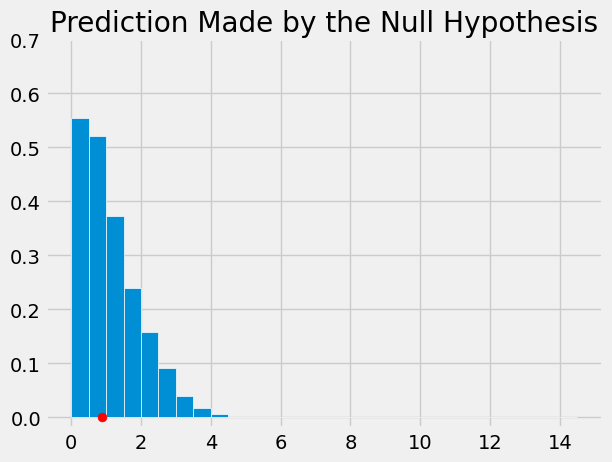

In [14]:
df_tvds = pd.DataFrame({'Distance between Sample % and 75%': distances})
df_tvds.hist(bins=np.arange(0, 15, 0.5), edgecolor='white', density=True)

plt.scatter(observed_statistic, 0, color='red', s=40);
plt.ylim(-0.02, 0.7)
plt.title('Prediction Made by the Null Hypothesis');
plt.show()

A estatística observada é como uma distância típica prevista pela hipótese nula. A hipótese nula é o modelo de Mendel. Portanto, nosso teste conclui que os dados são consistentes com o modelo de Mendel.

Com base em nossos dados, o modelo de Mendel parece bom.

## O significado de "consistente"

Em todos os nossos exemplos de avaliação de modelos, não houve dúvidas sobre se os dados eram consistentes com as previsões do modelo. Ou estavam muito longe do que o modelo previa, como nos exemplos sobre os painéis do júri, ou eram semelhantes ao que o modelo previa, como no exemplo sobre o modelo de Mendel.

Mas os resultados nem sempre são tão claros. Quão longe é "longe"? Exatamente o que significa "semelhante"? Embora essas perguntas não tenham respostas universais, existem algumas diretrizes e convenções que você pode seguir.

Mas, primeiro, é importante entender que se a estatística de teste observada é consistente com sua distribuição prevista sob a hipótese nula é uma questão de opinião e julgamento subjetivos. Recomendamos que você forneça seu julgamento junto com o valor da estatística de teste e um gráfico de sua distribuição prevista sob o valor nulo. Isso permitirá que seus leitores façam seu próprio julgamento sobre se os dois são consistentes.

No exemplo acima, o julgamento é claro. Mas suponha que alguém cultivasse outras 929 plantas de alguma variedade relacionada e quisesse ver se o modelo de Mendel também funcionava para plantas dessa variedade. O que você concluiria se a distância observada deles fosse 3,2 como mostrado abaixo?

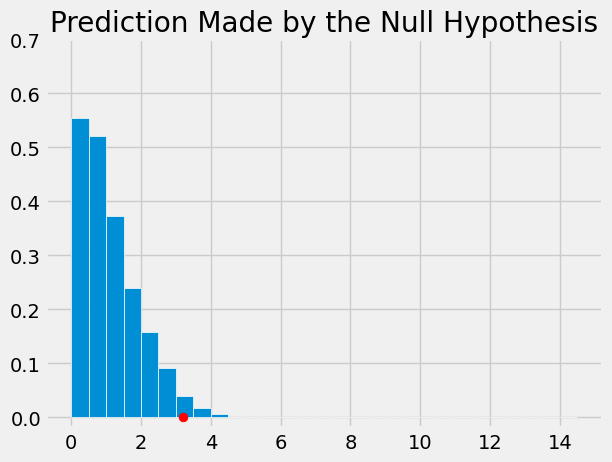

In [15]:
different_observed_statistic = 3.2

df_tvds = pd.DataFrame({'Distance between Sample % and 75%': distances})
df_tvds.hist(bins=np.arange(0, 15, 0.5), edgecolor='white', density=True)

plt.scatter(different_observed_statistic, 0, color='red', s=40);
plt.ylim(-0.02, 0.7)
plt.title('Prediction Made by the Null Hypothesis');
plt.show()

A observação baseada na nova variedade de plantas é consistente com as previsões do histograma ou não?

Agora a resposta não é tão clara. Depende se você acha que o ponto vermelho está muito longe do volume dos valores previstos para ser consistente com a previsão baseada no modelo de Mendel.

## Cortes convencionais e o valor-P
Se você não quiser usar seu próprio julgamento, existem convenções que você pode seguir. Essas convenções nos dizem o quão longe nas caudas é convencionalmente considerado "longe demais".

As convenções são baseadas na área da cauda, **começando na estatística observada (o ponto vermelho) e olhando na direção que nos faz inclinar para a alternativa.** Neste exemplo esse é o lado direito, porque grandes distâncias favorecem a alternativa que diz que o modelo não é bom.

Se a área da cauda for pequena, a estatística observada está longe dos valores mais comumente previstos pela hipótese nula.

Lembre-se que em um histograma, a área representa porcentagem. Para encontrar a área na cauda, temos que encontrar a porcentagem de distâncias maiores ou iguais a 3,2, onde está o ponto vermelho. A matriz `distances` contém as médias para todas as 10.000 repetições de amostragem aleatória sob o modelo de Mendel, e `different_observed_statistic` é 3,2.

In [16]:
np.count_nonzero(distances >= different_observed_statistic) / repetitions

0.0243

Cerca de 2,4% das distâncias simuladas no modelo de Mendel foram 3,2 ou mais. Pela lei das médias, podemos concluir que, se o modelo de Mendel estivesse correto para essas novas plantas, haveria cerca de 2,4% de chance de que a estatística de teste fosse 3,2 ou mais.

Isso não parece uma grande chance. Se o modelo de Mendel for verdadeiro para essas plantas, algo bastante improvável aconteceu. Essa ideia dá origem às convenções.

### O valor-p ##

Essa chance tem um nome impressionante. É chamado de *nível de significância observado* do teste. Isso é um bocado, e por isso é comumente chamado de *p-valor* do teste.

**Definição:** o valor-p de um teste é a chance, com base no modelo na hipótese nula, de que a estatística do teste seja igual ao valor observado na amostra ou ainda mais na direção que suporta a alternativa .

Se um valor-p for pequeno, isso significa que a cauda além da estatística observada é pequena e, portanto, a estatística observada está longe do que o nulo prevê. Isso implica que os dados apóiam a hipótese alternativa mais do que a hipótese nula.

Quão pequeno é "pequeno"? De acordo com as convenções:

- Se o valor de p for menor que 5%, ele é considerado pequeno e o resultado é denominado "estatisticamente significativo".

- Se o valor-p for ainda menor – menos de 1% – o resultado é chamado de "altamente significativo estatisticamente".

Por essa convenção, nosso valor-p de 2,4% é considerado pequeno. Portanto, a conclusão convencional seria rejeitar a hipótese nula e dizer que o modelo de Mendel não parece bom para as novas plantas. Formalmente, o resultado do teste é estatisticamente significativo.

Ao chegar a uma conclusão dessa maneira, recomendamos que você não diga apenas se o resultado é ou não estatisticamente significativo. Juntamente com sua conclusão, forneça a estatística observada e o valor-p também, para que os leitores possam usar seu próprio julgamento.

## Nota Histórica sobre as Convenções

A determinação da significância estatística, conforme definido acima, tornou-se padrão em análises estatísticas em todos os campos de aplicação. Quando uma convenção é tão universalmente seguida, é interessante examinar como ela surgiu.

O método de teste estatístico – escolher entre hipóteses com base em dados em amostras aleatórias – foi desenvolvido por Sir Ronald Fisher no início do século XX. Sir Ronald pode ter estabelecido a convenção de significância estatística de forma um tanto involuntária, na seguinte declaração em seu livro de 1925 *Statistical Methods for Research Workers*. Sobre o nível de 5%, ele escreveu: "É conveniente tomar esse ponto como um limite para julgar se um desvio deve ser considerado significativo ou não".

O que era "conveniente" para Sir Ronald tornou-se um limite que adquiriu o status de constante universal. Não importa que o próprio Sir Ronald tenha afirmado que o valor foi sua escolha pessoal entre muitos: em um artigo em 1926, ele escreveu: "Se uma em vinte não parecer uma probabilidade alta o suficiente, podemos, se preferirmos, tirar a linha em um em cinquenta (o ponto de 2 por cento), ou um em cem (o ponto de 1 por cento). Pessoalmente, o autor prefere estabelecer um padrão baixo de significância no ponto de 5 por cento..."

Fisher sabia que "baixo" é uma questão de julgamento e não tem uma definição única. Sugerimos que você também tenha isso em mente. Forneça seus dados, faça seu julgamento e explique por que você o fez.

Quer você use um corte convencional ou seu próprio julgamento, é importante manter os seguintes pontos em mente.

- Sempre forneça o valor observado da estatística de teste e o valor-p, para que os leitores possam decidir se acham ou não que o valor-p é pequeno.
- Não tente desafiar as convenções apenas quando o resultado derivado convencionalmente não for do seu agrado.
- Mesmo que um teste conclua que os dados não suportam o modelo de chance na hipótese nula, ele normalmente não explica *por que* o modelo não funciona. Não tire conclusões causais sem uma análise mais aprofundada, a menos que esteja realizando um estudo randomizado controlado. Vamos analisá-los em uma seção posterior.